## PCA

## Task 1: Exploratory Data Analysis (EDA):

In [779]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [781]:
wine = pd.read_csv('wine.csv')

In [783]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [785]:
data = wine.iloc[:, 1:]

In [787]:
data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Check for Outliers

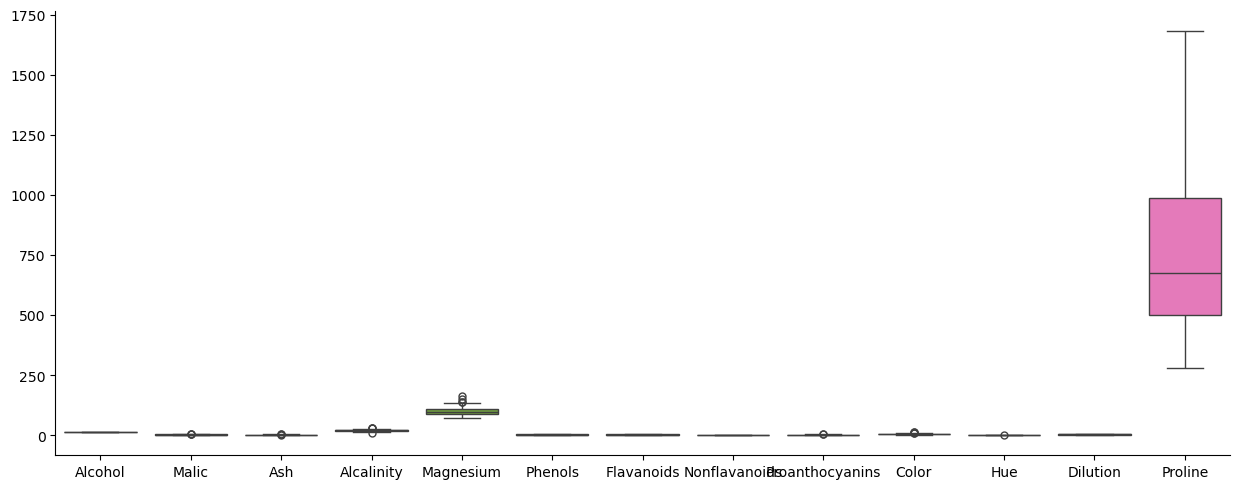

In [790]:
sns.catplot(data, kind = 'box', height = 5, aspect = 2.5 )
plt.show()

In [792]:
new_data = data
outliers = {}

for i in data:
    Q1 = new_data[i].quantile(0.25)
    Q3 = new_data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    new_data[i]=new_data[i].apply(lambda x:upper_limit if x> upper_limit else (lower_limit if x<lower_limit else x))

In [794]:
new_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


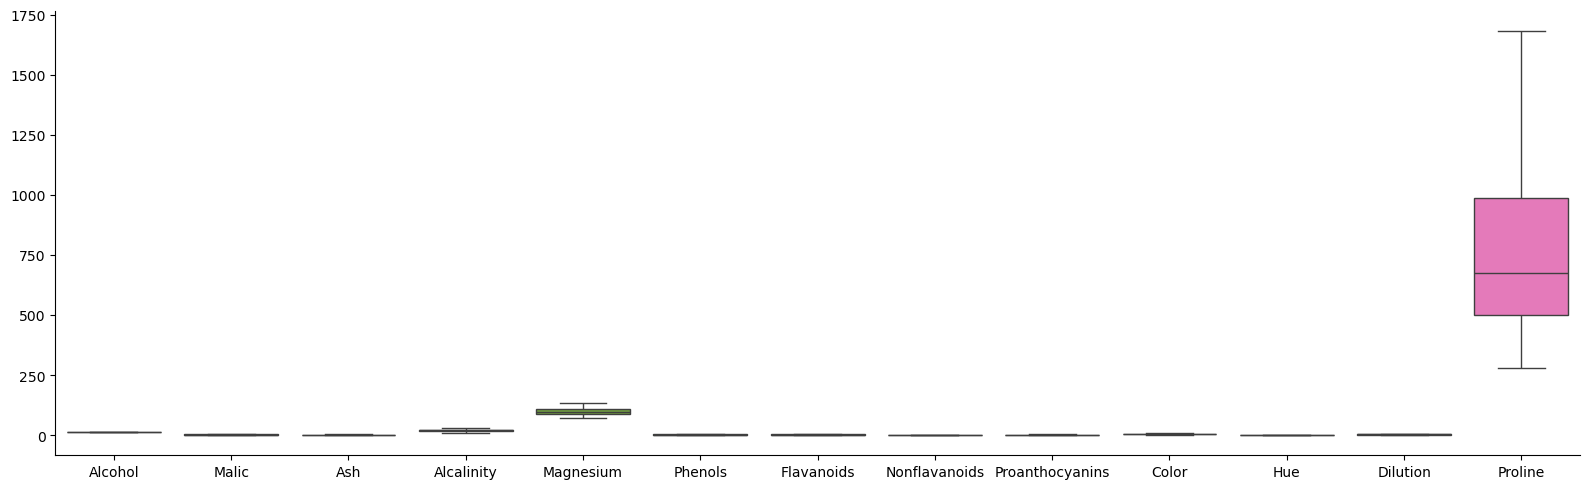

In [796]:
sns.catplot(new_data, kind = 'box', height = 5, aspect = 3.2)
plt.show()

In [798]:
new_data.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562
Color,0.549107,0.264897,0.256799,0.009748,0.240505,-0.062101,-0.169807,0.131596,-0.032693,1.000000,-0.520416,-0.430638,0.327100


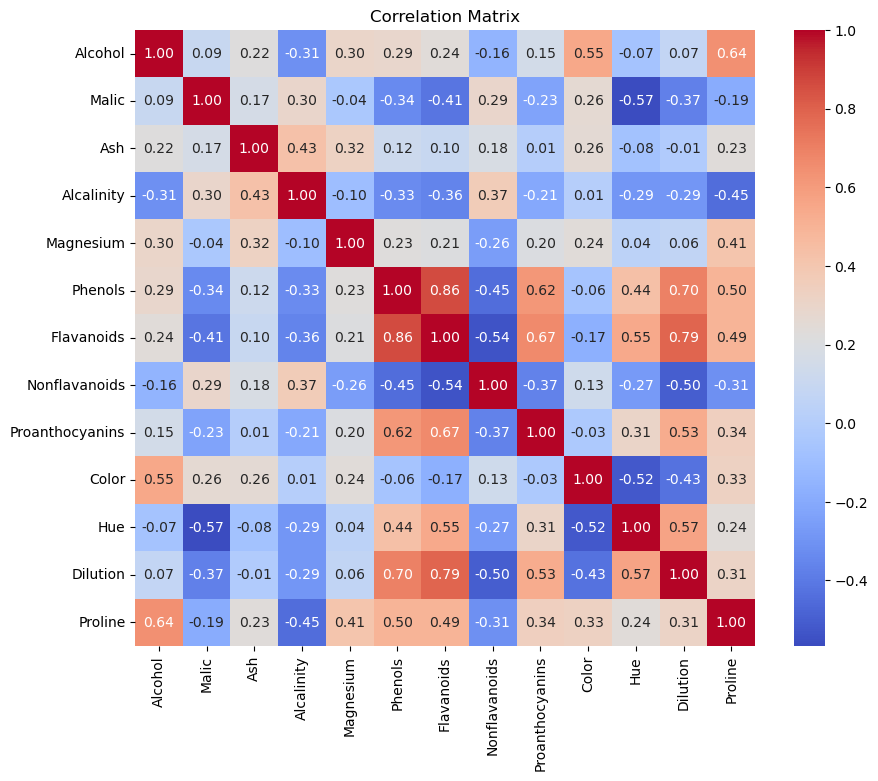

In [800]:
corr_matrix = new_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Task 2: Dimensionality Reduction with PCA:

In [803]:
ori_data = new_data.iloc[:, :]

In [805]:
ori_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Scale the data

In [808]:
from sklearn.preprocessing import StandardScaler

In [810]:
scaler = StandardScaler()

In [812]:
scaled_data = scaler.fit_transform(ori_data)

In [814]:
scaled_data

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

## Implement PCA to reduce the dimensionality of the dataset

In [816]:
from sklearn.decomposition import PCA

In [817]:
pca = PCA(n_components = 13)

In [818]:
pca_data = pca.fit_transform(scaled_data)

In [819]:
pca_data

array([[ 3.35814747,  1.52022185, -0.12637492, ..., -0.35905487,
         0.59934286, -0.1082988 ],
       [ 2.22921481, -0.33326137, -2.04283756, ..., -0.12060222,
         0.3722891 ,  0.00364028],
       [ 2.54005743,  1.03695315,  1.01884481, ..., -0.28999114,
         0.04671301,  0.04203325],
       ...,
       [-2.67116907,  2.86530059, -0.97512583, ...,  0.59573367,
         0.64695727, -0.02552532],
       [-2.37160346,  2.39380794, -0.56148477, ...,  0.35395561,
         0.34668062, -0.08347129],
       [-3.22745394,  2.80053456,  1.03090733, ..., -0.28617201,
        -0.13792419, -0.32602699]])

## Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

In [826]:
pca.explained_variance_ratio_

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [828]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36475803, 0.56085577, 0.66996759, 0.74059137, 0.8035612 ,
       0.85171187, 0.89202691, 0.91947224, 0.9417974 , 0.96110846,
       0.97866279, 0.99192912, 1.        ])

## Task 3: Clustering with Original Data:

## Hyperparameter Tunning

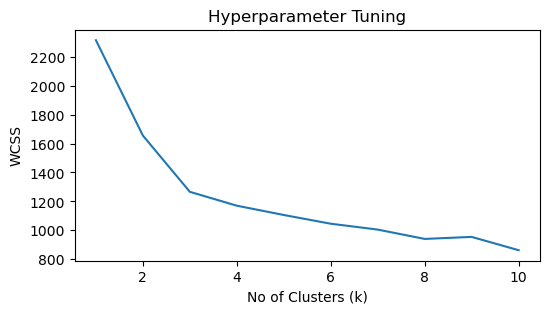

In [833]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i)
    model.fit(scaled_data)
    wcss.append(model.inertia_)
plt.figure(figsize=(6,3))
plt.title('Hyperparameter Tuning')
plt.xlabel('No of Clusters (k)')
plt.ylabel('WCSS')
plt.plot(range(1,11), wcss)
plt.show()
    
    

## KMEANS

In [836]:
from sklearn.cluster import KMeans

In [838]:
kmeans_model = KMeans(n_clusters=6)

In [840]:
kmeans = kmeans_model.fit(scaled_data)

In [842]:
kmeans.labels_

array([3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 5, 5, 5, 5, 1, 5, 1,
       1, 1, 5, 5, 5, 1, 1, 3, 1, 5, 5, 5, 5, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       4, 1, 4, 4, 4, 1, 1, 3, 5, 1, 1, 1, 5, 5, 1, 1, 1, 4, 1, 4, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 3, 4, 1, 1, 1, 1, 4, 1, 4, 5, 2,
       2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [844]:
ori_data['labels'] = kmeans.labels_

In [846]:
ori_data.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,labels
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3


## Evaluate the clustering performance using metrics such as silhouette score

In [849]:
from sklearn.metrics import silhouette_score

In [851]:
silhouette_score(scaled_data, ori_data['labels'])

0.13225520224253753

## Task 4: Clustering with PCA Data:

In [854]:
p_data = new_data.iloc[:, :]

In [856]:
pca_model = KMeans(n_clusters=6)

In [858]:
pca_ = pca_model.fit(pca_data)

In [862]:
pca_.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 4, 0, 1, 4, 1,
       0, 0, 4, 0, 4, 1, 1, 3, 1, 0, 0, 4, 0, 1, 0, 1, 1, 2, 1, 0, 4, 1,
       4, 1, 4, 4, 4, 1, 1, 3, 5, 0, 1, 1, 0, 0, 1, 0, 1, 4, 1, 4, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,
       5, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 5, 5, 5, 5, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2,
       2, 2])

In [864]:
p_data['labels'] = pca_.labels_

In [866]:
p_data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,labels
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


## Evaluate the clustering performance using metrics such as silhouette score

In [869]:
silhouette_score(pca_data, p_data['labels'])

0.2011595157539432

## Task 5: Comparison and Analysis 
### Comparing Clustering Results (Original vs PCA Data):
#### The clustering score for the original data is 0.132, while for PCA-transformed data, it is 0.201.
#### Since higher scores are better, PCA helped create clearer clusters.

### Similarities & Differences:
#### Both methods grouped the data, but PCA gave better clusters.
#### PCA removed unnecessary details, making groups easier to separate.

### Effect of PCA on Clustering:
#### PCA made clustering more accurate by removing extra information.
#### It also reduced confusion between similar groups.

### Pros & Cons of PCA vs. Clustering on Original Data:
#### PCA helps: Makes clustering easier, removes noise, and speeds up processing.
#### PCA downside: Some information is lost, which may affect results. 
#### Original Data: Keeps full details but may mix up clusters if data is too complex.

## Task 6: Conclusion and Insights
### Key Takeaways:
#### PCA improved clustering, making groups more distinct.
#### Without PCA, clustering was less effective.

### Why PCA & Clustering Matter:
#### PCA helps when data has too many columns by simplifying it.
#### Clustering works better when only important features are kept.

### When to Use Each Method:
#### Use PCA if data is large and messy.
#### Use original data if you need full details.